In [145]:
#
#ホテルの価格予測
#
# My Drive/
#   └ SIGNATE3_kakaku/
#        ├sample_submit.csv
#        ├test.csv
#        ├train.csv
#        ├ hotel_Price.ipynb
#        └ my_models/
#            └ models.py
#

In [146]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [241]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.linear_model import LinearRegression as LR
import seaborn as sns 
import cv2
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor as rf

In [148]:
pwd

'/content'

In [149]:
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/SIGNATE3_kakaku/train.csv")
test = pd.read_csv("/content/drive/My Drive/SIGNATE3_kakaku/test.csv")
sample_submit= pd.read_csv("/content/drive/My Drive/SIGNATE3_kakaku/sample_submit.csv",header=None)

In [150]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
import lightgbm as lgb

In [152]:
import sys
sys.path.append('/content/drive/My Drive/SIGNATE3_kakaku/my_models')

In [153]:
import models

In [154]:
test.shape

(18528, 28)

In [155]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18528 entries, 0 to 18527
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18528 non-null  int64  
 1   accommodates            18528 non-null  int64  
 2   amenities               18528 non-null  object 
 3   bathrooms               18475 non-null  float64
 4   bed_type                18528 non-null  object 
 5   bedrooms                18508 non-null  float64
 6   beds                    18493 non-null  float64
 7   cancellation_policy     18528 non-null  object 
 8   city                    18528 non-null  object 
 9   cleaning_fee            18528 non-null  object 
 10  description             18528 non-null  object 
 11  first_review            14572 non-null  object 
 12  host_has_profile_pic    18488 non-null  object 
 13  host_identity_verified  18488 non-null  object 
 14  host_response_rate      13933 non-null

In [156]:
#●初動
#.csv取り込み
#.head().tail().info()
#.ラベルは多分よく使うので先にリストに入れていたほうが良い。
#.バリューカウンツ
#.nan確認

#○上記感想
#trein=(55583,29)  test = (18528, 28)
#アメニティは1要素、1点と出来ないか



#●考えられる前処理
#・ワンホット
#・id消す
#・trainと testつけて前処理。



In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      55583 non-null  int64  
 1   accommodates            55583 non-null  int64  
 2   amenities               55583 non-null  object 
 3   bathrooms               55436 non-null  float64
 4   bed_type                55583 non-null  object 
 5   bedrooms                55512 non-null  float64
 6   beds                    55487 non-null  float64
 7   cancellation_policy     55583 non-null  object 
 8   city                    55583 non-null  object 
 9   cleaning_fee            55583 non-null  object 
 10  description             55583 non-null  object 
 11  first_review            43675 non-null  object 
 12  host_has_profile_pic    55435 non-null  object 
 13  host_identity_verified  55435 non-null  object 
 14  host_response_rate      41879 non-null

In [158]:
# カラムインデックスリスト
prods = train.columns.tolist()
prods


['id',
 'accommodates',
 'amenities',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'latitude',
 'longitude',
 'name',
 'neighbourhood',
 'number_of_reviews',
 'property_type',
 'review_scores_rating',
 'room_type',
 'thumbnail_url',
 'zipcode',
 'y']

In [159]:
test.isnull().sum()

id                           0
accommodates                 0
amenities                    0
bathrooms                   53
bed_type                     0
bedrooms                    20
beds                        35
cancellation_policy          0
city                         0
cleaning_fee                 0
description                  0
first_review              3956
host_has_profile_pic        40
host_identity_verified      40
host_response_rate        4595
host_since                  40
instant_bookable             0
last_review               3947
latitude                     0
longitude                    0
name                         0
neighbourhood             1712
number_of_reviews            0
property_type                0
review_scores_rating      4166
room_type                    0
thumbnail_url             2071
zipcode                    250
dtype: int64

In [160]:
for i in prods:
  print("---------------------------------------------------------")
  print(i)
  print(train[i].unique())
  

---------------------------------------------------------
id
[    0     1     2 ... 55580 55581 55582]
---------------------------------------------------------
accommodates
[ 6  2  4  3  8  9  1  5 16 10  7 12 11 15 14 13]
---------------------------------------------------------
amenities
['{TV,"Wireless Internet",Kitchen,"Free parking on premises",Washer,Dryer,"Smoke detector"}'
 '{TV,"Cable TV",Internet,"Wireless Internet","Air conditioning",Kitchen,"Free parking on premises",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}'
 '{TV,Internet,"Wireless Internet",Kitchen,"Indoor fireplace","Buzzer/wireless intercom",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom 

In [161]:
train_test = pd.concat([train,test],ignore_index = True)

In [162]:
train_test.describe()

,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
count,74111.000000,74111.000000,73911.000000,74020.000000,73980.000000,74111.000000,74111.000000,74111.000000,57389.000000,55583.000000
mean,23159.062501,3.155146,1.235263,1.265793,1.710868,38.445958,-92.397525,20.900568,94.067365,160.163647
std,16266.832865,2.153589,0.582044,0.852143,1.254142,3.080167,21.705322,37.828641,7.836556,168.087140
min,0.000000,1.000000,0.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,1.000000
25%,9263.500000,2.000000,1.000000,1.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,74.000000
50%,18527.000000,2.000000,1.000000,1.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,111.000000
75%,37054.500000,4.000000,1.000000,1.000000,2.000000,40.746096,-73.954660,23.000000,100.000000,185.000000
max,55582.000000,16.000000,8.000000,10.000000,18.000000,42.390437,-70.985047,605.000000,100.000000,1999.000000


In [163]:
#tとｆでおおいｔで穴埋め
train_test["host_has_profile_pic"] = train_test["host_has_profile_pic"].fillna("t")
train_test["host_identity_verified"] = train_test["host_identity_verified"].fillna("t")
#Nanを一旦200％にして後で加工する。
train_test["host_response_rate"] = train_test["host_response_rate"].fillna("200%")

In [164]:
train_test.isnull().sum()

id                            0
accommodates                  0
amenities                     0
bathrooms                   200
bed_type                      0
bedrooms                     91
beds                        131
cancellation_policy           0
city                          0
cleaning_fee                  0
description                   0
first_review              15864
host_has_profile_pic          0
host_identity_verified        0
host_response_rate            0
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
property_type                 0
review_scores_rating      16722
room_type                     0
thumbnail_url              8216
zipcode                     966
y                         18528
dtype: int64

In [165]:
#host_response_rateを小数点にする
def get_pa_cent(x):
  return float(x.split("%")[0])/100


In [166]:
# host_response_rateを小数点にする
train_test["host_response_rate"] = train_test["host_response_rate"].apply(get_pa_cent)

In [167]:
tes = train_test[train_test["host_response_rate"] <= 1]

In [168]:
tes["host_response_rate"].mean()

0.9435196731885617

In [169]:
train_test["host_response_rate"][train_test["host_response_rate"] == 2] =0.94

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [170]:
#使えそうにないものを削除
#id・・不要、"description"・・・宣伝言葉、name・・・名前、neighbourhood・・・地名、thumbnail_url・・・サムネ、zipcode・・・郵便番号

drop_list = ["id","description","name","neighbourhood","thumbnail_url","zipcode"]
train_test = train_test.drop(columns=drop_list)


In [171]:
#host_since処理仮に1-1にして日にち変更
train_test["host_since"] = train_test["host_since"].replace(np.nan,"2000-01-01")
train_test["host_since"] = pd.to_datetime(train_test["host_since"])

In [172]:
# train_test.plot(kind = "scatter", x = "amenities_counts", y = "y")

In [173]:
print(train_test["amenities"][0].count(','))

6


In [174]:
#アメニティを量に変換したつもり
amenities_counts = train_test["amenities"].apply(lambda x: x.count(','))
train_test["amenities_counts"] = amenities_counts
train_test.drop(["amenities"],axis = 1,inplace=True)


In [175]:
train_test.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,first_review,host_has_profile_pic,...,instant_bookable,last_review,latitude,longitude,number_of_reviews,property_type,review_scores_rating,room_type,y,amenities_counts
0,6,2.0,Real Bed,1.0,4.0,flexible,LA,t,2016-07-27,t,...,f,2016-07-27,33.788931,-118.154761,1,Apartment,60.0,Private room,138.0,6
1,2,1.0,Real Bed,1.0,1.0,strict,DC,t,2016-09-12,t,...,f,2017-03-31,38.934810,-76.978190,9,House,100.0,Private room,42.0,21
2,2,2.0,Real Bed,1.0,1.0,strict,NYC,t,2016-06-15,t,...,t,2017-08-13,40.695118,-73.926240,27,Apartment,83.0,Private room,65.0,28
3,2,1.0,Real Bed,1.0,1.0,strict,SF,t,2014-03-15,t,...,t,2017-09-03,37.796728,-122.411906,38,Apartment,95.0,Private room,166.0,17
4,2,1.0,Real Bed,1.0,1.0,strict,NYC,t,2015-08-05,t,...,f,2017-09-10,40.785050,-73.974691,5,Apartment,100.0,Entire home/apt,165.0,17


In [176]:
amenities_counts

0         6
1        21
2        28
3        17
4        17
         ..
74106     9
74107    14
74108    17
74109    13
74110     6
Name: amenities, Length: 74111, dtype: int64

In [177]:
train_test["host_has_profile_pic"].value_counts()

t    73885
f      226
Name: host_has_profile_pic, dtype: int64

In [178]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

In [179]:
#ラベルエンコーダー。2値の処理をここでしている。
train_test["cleaning_fee"] = le.fit_transform(train_test["cleaning_fee"].values)
train_test["instant_bookable"] = le.fit_transform(train_test["instant_bookable"].values)
train_test["host_has_profile_pic"] = le.fit_transform(train_test["host_has_profile_pic"].values)
train_test["host_identity_verified"] = le.fit_transform(train_test["host_identity_verified"].values)

In [180]:
train_test.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,first_review,host_has_profile_pic,...,instant_bookable,last_review,latitude,longitude,number_of_reviews,property_type,review_scores_rating,room_type,y,amenities_counts
0,6,2.0,Real Bed,1.0,4.0,flexible,LA,1,2016-07-27,1,...,0,2016-07-27,33.788931,-118.154761,1,Apartment,60.0,Private room,138.0,6
1,2,1.0,Real Bed,1.0,1.0,strict,DC,1,2016-09-12,1,...,0,2017-03-31,38.934810,-76.978190,9,House,100.0,Private room,42.0,21
2,2,2.0,Real Bed,1.0,1.0,strict,NYC,1,2016-06-15,1,...,1,2017-08-13,40.695118,-73.926240,27,Apartment,83.0,Private room,65.0,28
3,2,1.0,Real Bed,1.0,1.0,strict,SF,1,2014-03-15,1,...,1,2017-09-03,37.796728,-122.411906,38,Apartment,95.0,Private room,166.0,17
4,2,1.0,Real Bed,1.0,1.0,strict,NYC,1,2015-08-05,1,...,0,2017-09-10,40.785050,-73.974691,5,Apartment,100.0,Entire home/apt,165.0,17


In [181]:
#ワンホント変換
rabel = ["bed_type","cancellation_policy","city"]
dummy_df = pd.get_dummies(train_test[rabel],drop_first = True)
train_test = pd.concat([train_test,dummy_df],axis = 1)
train_test = train_test.drop(columns=rabel)




In [182]:
train_test.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,...,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,6,2.0,1.0,4.0,1,2016-07-27,1,0,0.94,2016-07-13,...,1,0,0,0,0,0,0,1,0,0
1,2,1.0,1.0,1.0,1,2016-09-12,1,1,1.00,2015-12-30,...,1,0,1,0,0,0,1,0,0,0
2,2,2.0,1.0,1.0,1,2016-06-15,1,0,1.00,2016-05-21,...,1,0,1,0,0,0,0,0,1,0
3,2,1.0,1.0,1.0,1,2014-03-15,1,1,1.00,2012-06-19,...,1,0,1,0,0,0,0,0,0,1
4,2,1.0,1.0,1.0,1,2015-08-05,1,1,1.00,2015-03-25,...,1,0,1,0,0,0,0,0,1,0


In [183]:

#レビューのNanはなかったとする。仮にNanは2000年の一番最小
train_test["first_review"] = train_test["first_review"].replace(np.nan,"2000-01-01")
train_test["last_review"] = train_test["last_review"].replace(np.nan,"2000-01-01")

#dayに変換
train_test["first_review"] =pd.to_datetime(train_test["first_review"])
train_test["last_review"] = pd.to_datetime(train_test["last_review"])

In [184]:
import math
# math.sqrt(x)

In [185]:
tes = train_test["latitude"]**2+train_test["longitude"]**2
tes2 = tes**0.5

In [186]:
train_test["kyori"] = tes2

In [187]:
#x_cut,bin_indiceこの2つは必要
#17に分けている。そして、それを17個のワンホットにしている
# x_cut,bin_indice = pd.cut(train_test["first_review"],bins = 17,retbins =True)
# y_cut,bin_indice = pd.cut(train_test["last_review"],bins = 17,retbins =True)

# first_review_dummys = pd.get_dummies(x_cut,prefix = x_cut.name)
# last_review_dummys = pd.get_dummies(y_cut,prefix = x_cut.name)

# train_test = pd.concat([train_test,first_review_dummys],axis = 1)
# train_test = pd.concat([train_test,last_review_dummys],axis = 1)

In [188]:
train_test

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,...,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,kyori
0,6,2.0,1.0,4.0,1,2016-07-27,1,0,0.94,2016-07-13,...,0,0,0,0,0,0,1,0,0,122.891169
1,2,1.0,1.0,1.0,1,2016-09-12,1,1,1.00,2015-12-30,...,0,1,0,0,0,1,0,0,0,86.264484
2,2,2.0,1.0,1.0,1,2016-06-15,1,0,1.00,2016-05-21,...,0,1,0,0,0,0,0,1,0,84.387093
3,2,1.0,1.0,1.0,1,2014-03-15,1,1,1.00,2012-06-19,...,0,1,0,0,0,0,0,0,1,128.114275
4,2,1.0,1.0,1.0,1,2015-08-05,1,1,1.00,2015-03-25,...,0,1,0,0,0,0,0,1,0,84.472926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4,1.0,2.0,2.0,1,2000-01-01,1,1,1.00,2009-11-16,...,0,1,0,0,0,0,0,1,0,84.431215
74107,2,1.0,2.0,1.0,0,2017-01-16,1,0,1.00,2017-01-08,...,0,0,0,0,1,0,0,0,0,97.189735
74108,5,1.5,2.0,2.0,1,2000-01-01,1,0,1.00,2014-09-02,...,0,0,0,0,1,0,0,0,0,97.216744
74109,2,1.0,1.0,2.0,1,2016-04-15,1,0,1.00,2014-03-17,...,0,1,0,0,0,0,0,1,0,84.450754


In [189]:
#緯度経度もワンホットにしてみる。
# x_cut,bin_indice = pd.cut(train_test["latitude"],bins = 20,retbins =True)
# y_cut,bin_indice = pd.cut(train_test["longitude"],bins = 20,retbins =True)

# first_review_dummys = pd.get_dummies(x_cut,prefix = x_cut.name)
# last_review_dummys = pd.get_dummies(y_cut,prefix = x_cut.name)

# train_test = pd.concat([train_test,first_review_dummys],axis = 1)
# train_test = pd.concat([train_test,last_review_dummys],axis = 1)



In [190]:
#ワンホットにしたものはdropする。
drop_list = ["latitude","longitude"]
train_test = train_test.drop(columns=drop_list)

In [191]:
#Nanは平均で埋める
train_test["bathrooms"] = train_test["bathrooms"].fillna(train_test["bathrooms"].mean())
train_test["bedrooms"] = train_test["bedrooms"].fillna(train_test["bedrooms"].mean())
train_test["beds"] = train_test["beds"].fillna(train_test["beds"].mean())
train_test["review_scores_rating"]=train_test["review_scores_rating"].fillna(train_test["review_scores_rating"].mean())

In [192]:
# train_test["property_type"] = le.fit_transform(train_test["property_type"].values)

In [193]:
albel = ["Serviced apartment","Tent","Castle","Vacation home","Yurt","Hut","Treehouse","Chalet","Earth House","Tipi","Cave","Train","Island","Parking Space","Casa particular","Lighthouse"]

In [194]:
for i in albel:
  train_test["property_type"][train_test["property_type"] == i] = "Other"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [195]:
train_test["property_type"].value_counts()

Apartment          49003
House              16511
Condominium         2658
Townhouse           1692
Loft                1244
Other                715
Guesthouse           498
Bed & Breakfast      462
Bungalow             366
Villa                179
Dorm                 142
Guest suite          123
Camper/RV             94
Timeshare             77
Cabin                 72
In-law                71
Hostel                70
Boutique hotel        69
Boat                  65
Name: property_type, dtype: int64

In [196]:
train_test["property_type"].value_counts()


Apartment          49003
House              16511
Condominium         2658
Townhouse           1692
Loft                1244
Other                715
Guesthouse           498
Bed & Breakfast      462
Bungalow             366
Villa                179
Dorm                 142
Guest suite          123
Camper/RV             94
Timeshare             77
Cabin                 72
In-law                71
Hostel                70
Boutique hotel        69
Boat                  65
Name: property_type, dtype: int64

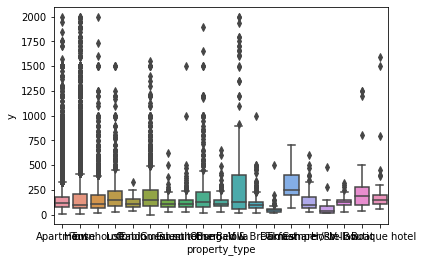

In [197]:
sns.boxplot(data = train_test,x ="property_type",y ="y" )

In [198]:
train_test['room_type'].value_counts()

Entire home/apt    41310
Private room       30638
Shared room         2163
Name: room_type, dtype: int64

In [199]:
#10以下の分類をその他にする。

In [200]:
#残りの分もワンホント変換
rabel =  ['room_type','property_type']
dummy_df = pd.get_dummies(train_test[rabel],drop_first = True)
train_test = pd.concat([train_test,dummy_df],axis = 1)
train_test = train_test.drop(columns=rabel)

In [201]:

print(type(py_dt))

<class 'datetime.datetime'>


In [202]:
print(type(train_test['first_review']))

<class 'pandas.core.series.Series'>


In [203]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   accommodates                         74111 non-null  int64         
 1   bathrooms                            74111 non-null  float64       
 2   bedrooms                             74111 non-null  float64       
 3   beds                                 74111 non-null  float64       
 4   cleaning_fee                         74111 non-null  int64         
 5   first_review                         74111 non-null  datetime64[ns]
 6   host_has_profile_pic                 74111 non-null  int64         
 7   host_identity_verified               74111 non-null  int64         
 8   host_response_rate                   74111 non-null  float64       
 9   host_since                           74111 non-null  datetime64[ns]
 10  instant_bo

In [204]:
s

NameError: ignored

In [205]:





rabel =  ['first_review','host_since',"last_review"]
train_test = train_test.drop(columns=rabel)


In [206]:
train_test.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,...,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Timeshare,property_type_Townhouse,property_type_Villa
0,6,2.0,1.0,4.0,1,1,0,0.94,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1.0,1.0,1,1,1,1.00,0,9,...,0,0,0,1,0,0,0,0,0,0
2,2,2.0,1.0,1.0,1,1,0,1.00,1,27,...,0,0,0,0,0,0,0,0,0,0
3,2,1.0,1.0,1.0,1,1,1,1.00,1,38,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,1.0,1.0,1,1,1,1.00,0,5,...,0,0,0,0,0,0,0,0,0,0


In [221]:
no = train_test[(train_test["y"] ==1)].index
train_test = train_test.drop(no,axis = 0)

In [226]:
train = train.drop(no,axis = 0)

In [227]:
train_test.shape

(74110, 47)

In [228]:
#ルーム分けしない場合　test 15931.095920906506　　train 15538.05308189707
train_X = train_test[~train_test["y"].isnull()].drop("y",axis = 1)
train_Y = train["y"]
test_x = train_test[train_test["y"].isnull()].drop("y",axis = 1)

In [244]:
models_rf = []
rmses_rf = []
oof_rf = np.zeros(len(train_X))
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    model_rf = rf(
        n_estimators=50,
        random_state=1234
    )
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_valid)
    tmp_rmse = np.sqrt(MSE(y_valid, y_pred))
    print(tmp_rmse)
    models_rf.append(model_rf)
    rmses_rf.append(tmp_rmse)
    oof_rf[val_index] = y_pred

119.39811537388654
112.74430057513402
117.23287066556897
114.49398761020987


In [245]:
sum(rmses_rf)/len(rmses_rf)

115.96731855619984

In [247]:
preds_rf = []
for model in models_rf:
    pred = model.predict(test_x)
    preds_rf.append(pred)

In [248]:
preds_rf

[array([214.02, 151.96, 138.16, ..., 188.72, 157.52,  35.48]),
 array([197.8 , 137.18, 106.56, ..., 257.04, 168.96,  30.22]),
 array([190.32, 151.74, 120.52, ..., 202.66, 167.02,  35.68]),
 array([204.76, 140.44, 114.3 , ..., 336.76, 167.32,  29.98])]

In [250]:
preds_mean_rf = np.mean(preds_rf, axis=0)

In [251]:
preds_mean_rf

array([201.725, 145.33 , 119.885, ..., 246.295, 165.205,  32.84 ])

In [229]:
X_train,X_test,y_train,y_test = train_test_split(train_X,train_Y,random_state = 20)
lr = LR()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
test_test = lr.predict(test_x)
mse_train = MSE(y_pred_train,y_train)
mse_test = MSE(y_pred_test,y_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(rmse_train)
print(rmse_test)

126.98991516893805
125.35907017868922


In [230]:
test_test

array([306.69137606, 146.37072194,  66.47508019, ..., 243.69727756,
       151.59397229,  26.74456186])

In [252]:
sample_submit[1]=test_test

In [254]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

PATH_MYDRIVE="/content/drive/My Drive/SIGNATE3_kakaku"
sample_submit.to_csv(f'{PATH_MYDRIVE}/submit.csv', index=False)
!ls -lrt '{PATH_MYDRIVE}'

total 99718
-rw------- 1 root root   155642 Apr  1 22:27  sample_submit.csv
-rw------- 1 root root 24919869 Apr  1 22:27  test.csv
-rw------- 1 root root 75690186 Apr  1 22:27  train.csv
-rw------- 1 root root   192849 Apr  2 11:34  info.png
-rw------- 1 root root    11129 Apr  3 10:55  data_index.xlsx
-rw------- 1 root root   440370 Apr  3 15:43  submit2.csv
-rw------- 1 root root   133374 Apr  3 15:53  Untitled0.ipynb
drwx------ 3 root root     4096 Jun 13 21:43  my_models
-rw------- 1 root root   206572 Jun 19 03:03 ' hotel_Price.ipynb'
-rw------- 1 root root   354767 Jun 19 03:04  submit.csv
